In [94]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import seaborn as sns

%matplotlib inline

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# read data
# train 하게 될 데이터 셋 이게 첫번째 데이터셋
data = pd.read_csv('/content/drive/MyDrive/2022-2/1103_cafe.csv')

In [97]:
data.head(5)

,Unnamed: 0,text,NAVER,mbti
0,0,오늘 공통분모 사람들이랑 얘길 잠깐 나눴는데. 주변에서 보기엔 그 여자분하고 조만간...,I had a quick talk with people in common denom...,ENFJ
1,1,저는 잘 못 느끼겠는데 주변에서 제가 목소리가 너무 작다고 뭐라고 말했냐고 물어보는...,"I don't really feel it, but people around me o...",ENFJ
2,2,"퇴근 후 평일 야간일을 생각중인데, 시간대가 딱 맞는게 없네요 이럴때는 역시 대도시...","I'm thinking of a weekday night after work, bu...",ENFJ
3,3,퇴근 후에 오랜만에 들어보는 시도강님의 음악. 동양풍의 음악을 듣고 있으면 확실히 ...,It's been a while since I listened to Shido Ka...,ENFJ
4,4,"오늘은 피로가 누적이 됐었는지, 9시쯤 저도 모르게 잠들었다가 이제 일어났네요 ^^...","Today, I fell asleep unconsciously around 9 o'...",ENFJ


In [98]:
[p.split('|||') for p in data.head(1).NAVER.values]

[["I had a quick talk with people in common denominator today. People around me say I'm going out with her soon. (Maybe they're already dating) I feel so betrayed. When I was worried about her, she said she didn't have any rationality, and when she talked about the reunion, she said it would be difficult because she didn't have enough time, so she hugged me, met me, ate, contacted me every day, exercised, and bought me flowers.I guess I was just an old, bad-looking insurance. Six and a half years seems to be a big and important time for me. I forgot about it in a flash and found a new person, and I didn't even talk to her about breaking up, but I went to a wine bar and fought and broke up with her. It's so painful and I'm having a hard time right now."]]

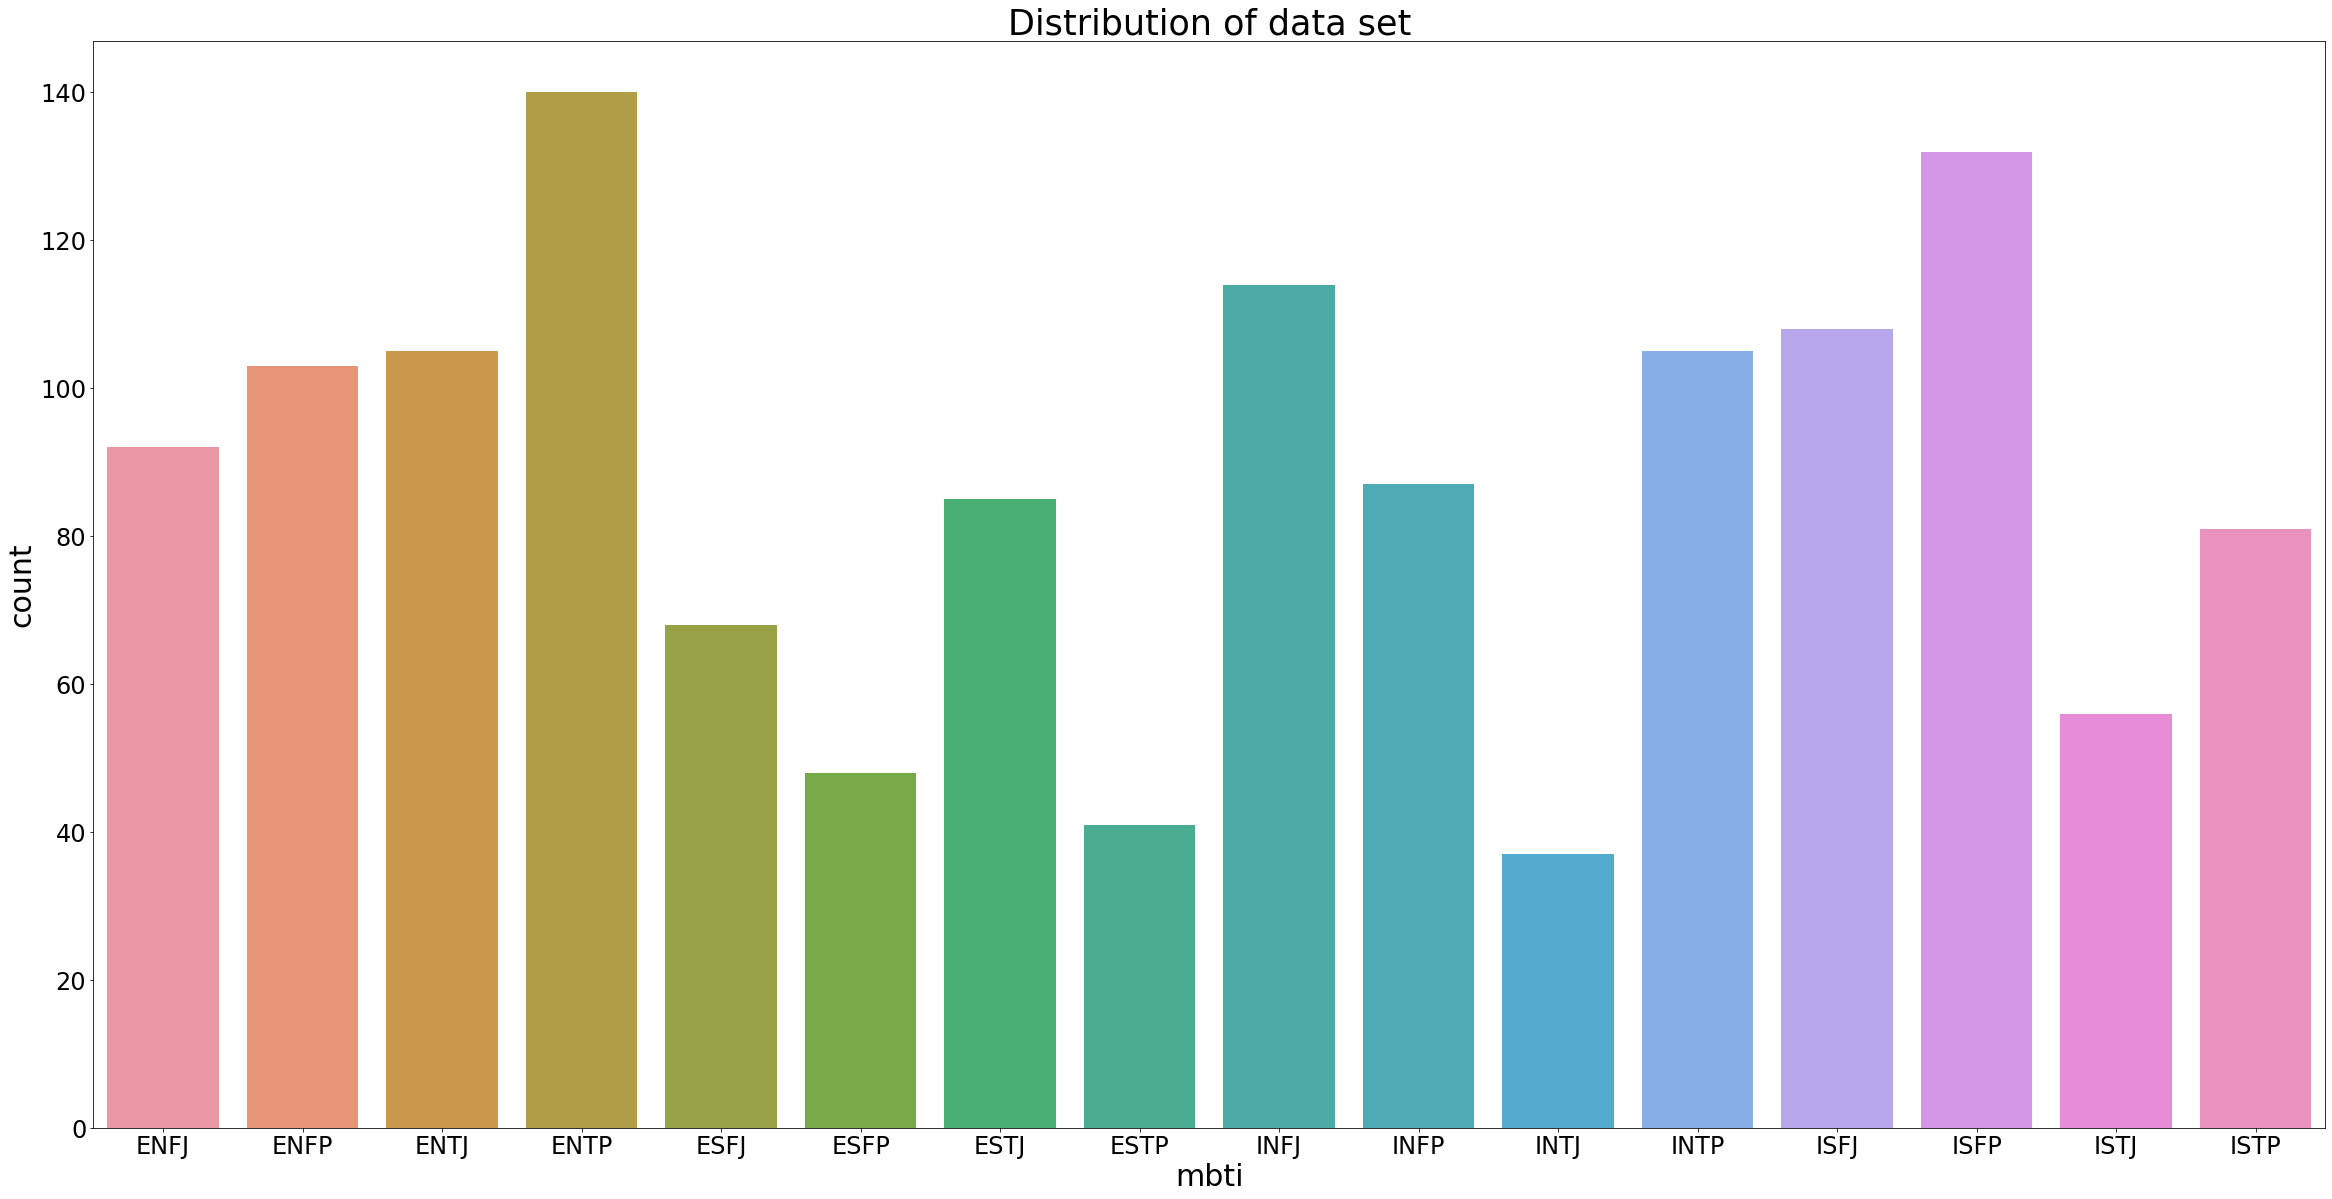

In [99]:
plt.figure(figsize=(40,20))
plt.xlabel('mbti', size = 30)
plt.ylabel('mbti', size = 30)
plt.title('Distribution of data set', size=35)
plt.xticks(fontsize=24, rotation=0)
plt.yticks(fontsize=24, rotation=0)
sns.countplot(data=data, x='mbti')

#Preprocessing

Label Encoding

In [100]:
##### Encode each type to an int

from sklearn.preprocessing import LabelEncoder

unique_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
lab_encoder = LabelEncoder().fit(unique_type_list)

Posts cleaning

In [101]:
import nltk
import time
##### Compute list of subject with Type | list of comments 

# Time
%time data.NAVER[1].replace('+', ' ').replace('.', ' ').replace(',', ' ').replace(':', ' ')
%time re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', data.NAVER[1])


from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('stopwords')

# Lemmatizer | Stemmatizer
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
cachedStopWords = stopwords.words("english")

# One post
OnePost = data.NAVER[1]

# List all urls
urls = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', OnePost)

# Remove urls
temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 'link', OnePost)

# Keep only words
temp = re.sub("[^a-zA-Z]", " ", temp)

# Remove spaces > 1
temp = re.sub(' +', ' ', temp).lower()

# Remove stopwords and lematize
%time stemmer.stem(" ".join([w for w in temp.split(' ') if w not in cachedStopWords]))

print("\nBefore preprocessing:\n\n", OnePost[0:500])
print("\nAfter preprocessing:\n\n", temp[0:500])
print("\nList of urls:")
urls

CPU times: user 129 µs, sys: 75 µs, total: 204 µs
Wall time: 212 µs
CPU times: user 57 µs, sys: 0 ns, total: 57 µs
Wall time: 60.1 µs
CPU times: user 177 µs, sys: 0 ns, total: 177 µs
Wall time: 180 µs

Before preprocessing:

 I don't really feel it, but people around me often ask me what I said because my voice is too small이번에 Han Ye-jin is supposed to participate in the National High School Acting Competition, but I feel bad that she was pointed out by the acting teacher to raise her two voicesWhat should I do to make my voice loud?"T"

After preprocessing:

 i don t really feel it but people around me often ask me what i said because my voice is too small han ye jin is supposed to participate in the national high school acting competition but i feel bad that she was pointed out by the acting teacher to raise her two voiceswhat should i do to make my voice loud t 

List of urls:


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]

In [102]:
import nltk
nltk.download('wordnet')
##### Compute list of subject with Type | list of comments 
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')

# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

def pre_process_data(data, remove_stop_words=True):

    list_personality = []
    list_posts = []
    len_data = len(data)
    i=0
    
    for row in data.iterrows():
        i+=1
        if i % 500 == 0:
            print("%s | %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].NAVER
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in cachedStopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])

        type_labelized = lab_encoder.transform([row[1].mbti])[0]
        list_personality.append(type_labelized)
        list_posts.append(temp)

    #del data
    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

list_posts, list_personality = pre_process_data(data, remove_stop_words=True)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


500 | 1402 rows
1000 | 1402 rows


In [103]:
list_posts

array(['quick talk people common denominator today people around say going soon maybe already dating feel betrayed worried said rationality talked reunion said would difficult enough time hugged met ate contacted every day exercised bought flower guess old bad looking insurance six half year seems big important time forgot flash found new person even talk breaking went wine bar fought broke painful hard time right ',
       'really feel people around often ask said voice small han ye jin supposed participate national high school acting competition feel bad pointed acting teacher raise two voiceswhat make voice loud ',
       'thinking weekday night work perfect time slot think big city best believe work ',
       ...,
       'feel way totally unique entp experience luckily hopefully find validate existence caffeine nicotine quit smoke vape best friend know would without see year vow make thing happiness soon someone tell something question everything sit listen ramble think feel like i

In [104]:
list_personality

array([0, 0, 0, ..., 9, 9, 9])

Vectorize with count and tf-idf

In [105]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,  
#                             ngram_range=(1,1),
                             max_df=0.5,
                             min_df=0.1) 
                                 
tfizer = TfidfTransformer()

print("CountVectorizer")
X_cnt = cntizer.fit_transform(list_posts)
print("Tf-idf")
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()

CountVectorizer
Tf-idf


In [106]:
X_tfidf.shape

(1402, 596)

In [107]:
 list_posts[0]

'quick talk people common denominator today people around say going soon maybe already dating feel betrayed worried said rationality talked reunion said would difficult enough time hugged met ate contacted every day exercised bought flower guess old bad looking insurance six half year seems big important time forgot flash found new person even talk breaking went wine bar fought broke painful hard time right '

LSA 하는 부분

In [108]:
print(np.around(X_tfidf, 2))
X_tfidf.shape

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.07 ... 0.   0.06 0.  ]
 [0.   0.05 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.06]]


(1402, 596)

In [109]:
from sklearn.decomposition import TruncatedSVD
# Truncated SVD
svd = TruncatedSVD(n_components=12, n_iter=7, random_state=42)
svd_vec = svd.fit_transform(X_tfidf)

In [110]:
print(np.around(svd_vec, 2))
svd_vec.shape

[[ 0.15 -0.09  0.03 ...  0.12  0.04  0.  ]
 [ 0.14 -0.08  0.   ...  0.15 -0.03  0.  ]
 [ 0.08 -0.05 -0.01 ... -0.02  0.05 -0.06]
 ...
 [ 0.42 -0.14  0.02 ... -0.03 -0.09  0.05]
 [ 0.49 -0.09 -0.02 ...  0.02 -0.1   0.03]
 [ 0.43 -0.12  0.   ... -0.01 -0.    0.13]]


(1402, 12)

 Plot first axes of decomposition

In [111]:
from sklearn.decomposition import KernelPCA, FastICA, PCA
from sklearn.preprocessing import StandardScaler

# PCA
pca_vec = PCA(n_components=12).fit_transform(X_tfidf)

# ICA
ica_vec = FastICA(n_components=12).fit_transform(X_tfidf)

In [112]:
print(np.around(pca_vec, 2))
pca_vec.shape

[[-0.27  0.27  0.08 ...  0.02  0.13  0.06]
 [-0.22  0.17  0.03 ... -0.02 -0.01 -0.09]
 [-0.23  0.24  0.01 ... -0.06 -0.07 -0.06]
 ...
 [-0.11 -0.09  0.02 ...  0.04 -0.03 -0.06]
 [-0.01 -0.15 -0.03 ...  0.08 -0.01 -0.05]
 [-0.07 -0.1  -0.01 ... -0.08  0.05 -0.09]]


(1402, 12)

In [113]:
print(np.around(ica_vec, 2))
ica_vec.shape

[[-0.01 -0.   -0.01 ...  0.   -0.02 -0.03]
 [-0.01 -0.05 -0.02 ...  0.   -0.02 -0.06]
 [-0.01  0.02  0.   ... -0.01  0.   -0.1 ]
 ...
 [-0.   -0.02 -0.02 ...  0.03  0.02  0.  ]
 [ 0.03  0.    0.02 ...  0.01  0.04  0.02]
 [-0.03 -0.01  0.02 ...  0.02 -0.    0.01]]


(1402, 12)

 Plot tsne for each pair of letter:

Extraversion (E) - Introversion (I)

Sensation (S) - INtuition (N)

Thinking (T) - Feeling (F)

Judgement (J) - Perception (P)

In [114]:
# Split mbti personality into 4 letters and binarize
titles = ["Extraversion (E) - Introversion (I)",
          "Sensation (S) - INtuition (N)",
          "Thinking (T) - Feeling (F)",
          "Judgement (J) - Perception (P)"
         ] 
b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    '''
    transform mbti to binary vector
    string 성격을 주면 list 성격 코드로 바꿔줌
    '''
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    '''
    transform binary vector to mbti personality
    list 성격 코드를 주면 string 성격으로 바꿔줌
    '''
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.mbti])
print("Binarize MBTI list: \n%s" % list_personality_bin)
list_personality_bin.shape

Binarize MBTI list: 
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


(1402, 4)

 Try multiple sklearn classifiers

In [115]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
##### Sklearn classifiers

from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

import xgboost as xgb
import pickle

# Vectorizer

cntizer = CountVectorizer(analyzer="word", 
                             max_features=1000, 
                             tokenizer=None,    
                             preprocessor=None, 
                             stop_words=None,   
                             max_df=0.5,
                             min_df=0.1) 

tfizer = TfidfTransformer()

# Classifiers
PassAgg = PassiveAggressiveClassifier(max_iter=50)

sgd = SGDClassifier(loss='hinge',   
              penalty='l1',   
              alpha=1e-2,     
              random_state=42,
              max_iter=7,     
              tol=None)

# SVM
lsvc = LinearSVC()
rbfsvc = SVC(kernel='rbf')
# SVM preding 결과 voting을 위한 one-hot encoder
OneHotEncoder = lambda x: np.eye(16)[x]

    
# Multinomial Naive Bayes
mlNB = MultinomialNB()

# Xgboost 
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob'
# scale weight of positive examples
param['eta'] = 0.6
param['ntrees'] = 300
param['subsample'] = 0.93
param['max_depth'] = 2
param['silent'] = 1
param['n_jobs'] = 8
param['num_class'] = len(unique_type_list)
# GPU 사용
param['gpu_id'] = 0
param['tree_method'] = 'gpu_hist'
xgb_class = xgb.XGBClassifier(**param)

 Stratified K-fold validation training

In [117]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
kf = StratifiedShuffleSplit(n_splits=1) # n_splits는 교차검증 횟수

X=list_posts
y=list_personality
for train, test in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    X_train = cntizer.fit_transform(X_train)
    X_test = cntizer.transform(X_test)
model = lsvc
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(type(preds))
#                 probs = np.add(probs, vote(preds))
preds_train = model.predict(X_train)

<class 'numpy.ndarray'>


In [118]:
# Train with k fold stratified validation

name = lambda x : str(x).split('(')[0]

def train_stratified(models, X, y, tf_idf=False, nsplits=3, confusion=False):
    '''
    Take a sklearn model like, feature set X, target set y and number of splits to compute Stratified kfold validation.
    Args:
        X (array):       Numpy array of features.
        y (str):         Target - Personality list.
        tf_idf (bool):  Wehther to use tf-idf on CountVectorizer.
        nsplits(int):    Number of splits for cross validation.
        confusion(bool): Wether to plot confusion matrix 
        
    Returns:
        dict: Dictionnary of classifiers and their cv f1-score.
    '''
#     fig_i = 0
    kf = StratifiedShuffleSplit(n_splits=nsplits)
    
    # Store fold score for each classifier in a dictionnary
    dict_score = {}
    dict_score['merged'] = 0
    for model in models:
        dict_score[name(model)] = 0
    
    # Stratified Split
    for train, test in kf.split(X,y):
        X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
        
        X_train = cntizer.fit_transform(X_train)
        X_test = cntizer.transform(X_test)
        
        # tf-idf
        if tf_idf == True:
            '''
            Bug! X_train_cnt 정의한 곳이 없음 kaggle 원본코드에도 없음;;
                                                    ↓요자식
            fix: 원저자는 idf matrix와 idf없는 matrix를 옆으로 붙여서 쓰려고 했던거 같다...
                 어찌할지 모르겠어서 떼버리고 tfidf matrix만 사용하도록 수정
            '''
            X_train_tfidf = tfizer.fit_transform(X_train)#(X_train_cnt)
            X_test_tfidf = tfizer.transform(X_test)#(X_test_cnt)
        
#             X_train = np.column_stack((X_train_tfidf.todense(), X_train))
            X_train = X_train_tfidf.toarray()
            
#             X_test = np.column_stack((X_test_tfidf.todense(), X_test))
            X_test = X_test_tfidf.toarray()
        
        probs = np.ones((len(y_test), 16))
        for model in models:
            # if xgboost use dmatrix
            if 'XGB' in name(model):
                xg_train = xgb.DMatrix(X_train, label=y_train)
                xg_test = xgb.DMatrix(X_test, label=y_test)
                watchlist = [(xg_train, 'train'), (xg_test, 'test')]
                num_round = 30
                bst = xgb.train(param, xg_train, num_round, watchlist, early_stopping_rounds=6)
                preds = bst.predict(xg_test)
                probs = np.add(probs, preds)
                preds = np.array([np.argmax(prob) for prob in preds])
            
            # Linear SVM, RBF SVM Classifier
            elif 'SVC' in name(model):
                
#                 #move data to GPU
#                 X_train = cp.asarray(X_train)
#                 y_train = cp.asarray(y_train)
#                 X_test =  cp.asarray(X_test)
#                 y_test = cp.asarray(y_test)
        
                model.fit(X_train, y_train)
                preds = model.predict(X_test)                
                probs = np.add(probs, OneHotEncoder(preds))
                preds_train = model.predict(X_train)
                
                # SVM은 predict_proba가 없어서 merged score update가 안됨.
                # SVM은 안된다...?
                
            # Multinomial Naive Bayes Classifier
            else:
                model.fit(X_train, y_train)
                preds = model.predict(X_test) 
                probs = np.add(probs, model.predict_proba(X_test))
                
            # f1-score
            train_score = f1_score(y_train, preds_train, average='weighted')
            test_score = f1_score(y_test, preds, average='weighted')
            dict_score[name(model)] += test_score
            print(f'''{name(model)}
            train f1-score:{train_score}
            test  f1-score:{test_score}
            ''')
            
            
            """
            Confusion matrix 그리는 부분
            """
#             if confusion == True:
#                 # Compute confusion matrix
#                 cnf_matrix = confusion_matrix(y_test, preds)
#                 np.set_printoptions(precision=2)
#                 # Plot confusion matrix
#                 plt.figure(fig_i)
#                 fig_i += 1
#                 plot_confusion_matrix(cnf_matrix, classes=lab_encoder.inverse_transform(range(16)), normalize=True,
#                                                           title=('Confusion matrix %s' % name(model)))
        
        # voting result: sum of class probabilites of each classifier 
        merged_preds = [np.argmax(prob) for prob in probs]
        score = f1_score(y_test, merged_preds, average='weighted')
        print(f'Merged score: {score}\n')
        dict_score['merged'] += score
        
    return {k: v / nsplits for k, v in dict_score.items()}

In [119]:
name(lsvc)

'LinearSVC'

In [120]:
results = train_stratified(models=[lsvc, mlNB, xgb_class], X=list_posts, y=list_personality, tf_idf=True, nsplits=10, confusion=False)

LinearSVC
            train f1-score:0.9952411941620245
            test  f1-score:0.5416764813403824
            
MultinomialNB
            train f1-score:0.9952411941620245
            test  f1-score:0.39188913351576354
            
[0]	train-merror:0.399683	test-merror:0.496454
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.333069	test-merror:0.460993
[2]	train-merror:0.299762	test-merror:0.411348
[3]	train-merror:0.272006	test-merror:0.411348
[4]	train-merror:0.250595	test-merror:0.453901
[5]	train-merror:0.229976	test-merror:0.460993
[6]	train-merror:0.214909	test-merror:0.439716
[7]	train-merror:0.191911	test-merror:0.432624
[8]	train-merror:0.162569	test-merror:0.425532
Stopping. Best iteration:
[2]	train-merror:0.299762	test-merror:0.411348

XGBClassifier
            train f1-score:0.9952411941620245
            test  f1-score:0.5554847629151035
            
Mer

# Compare multinomial naive bayes, xgb and their voting predictions

In [121]:
results

{'merged': 0.5479583940912699,
 'LinearSVC': 0.5479583940912699,
 'MultinomialNB': 0.4046131885968463,
 'XGBClassifier': 0.5492604538990846}

In [122]:
score_tfidf = pd.DataFrame(results, index=['f1 w/ tf-idf'])
results_idf_false = train_stratified(models=[lsvc, mlNB, xgb_class], X=list_posts, y=list_personality, tf_idf=False, nsplits=10, confusion=False)

LinearSVC
            train f1-score:0.9992034365573033
            test  f1-score:0.447801207215798
            
MultinomialNB
            train f1-score:0.9992034365573033
            test  f1-score:0.5656590275324219
            
[0]	train-merror:0.425853	test-merror:0.404255
Multiple eval metrics have been passed: 'test-merror' will be used for early stopping.

Will train until test-merror hasn't improved in 6 rounds.
[1]	train-merror:0.371927	test-merror:0.390071
[2]	train-merror:0.348136	test-merror:0.397163
[3]	train-merror:0.324346	test-merror:0.382979
[4]	train-merror:0.300555	test-merror:0.382979
[5]	train-merror:0.277557	test-merror:0.375887
[6]	train-merror:0.260111	test-merror:0.382979
[7]	train-merror:0.24663	test-merror:0.368794
[8]	train-merror:0.22046	test-merror:0.333333
[9]	train-merror:0.211737	test-merror:0.368794
[10]	train-merror:0.191118	test-merror:0.375887
[11]	train-merror:0.176844	test-merror:0.361702
[12]	train-merror:0.165741	test-merror:0.333333
[13]	trai

In [123]:
results_idf_false

{'merged': 0.5314546865169312,
 'LinearSVC': 0.3869891880342097,
 'MultinomialNB': 0.5359446879774743,
 'XGBClassifier': 0.485850994646721}

In [124]:
score_tfidf_false = pd.DataFrame(results_idf_false, index=['f1 w/o tf-idf'])
display(score_tfidf.append(score_tfidf_false))

,merged,LinearSVC,MultinomialNB,XGBClassifier
f1 w/ tf-idf,0.547958,0.547958,0.404613,0.549260
f1 w/o tf-idf,0.531455,0.386989,0.535945,0.485851


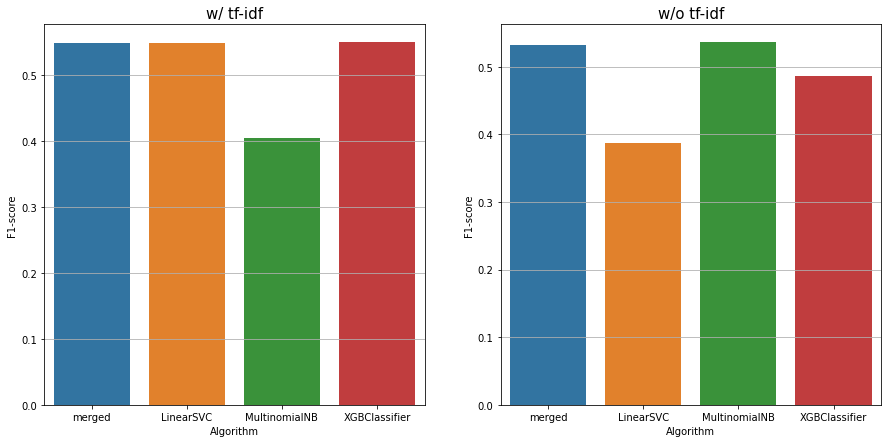

In [125]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=score_tfidf)

plt.xlabel('Algorithm', size = 10)
plt.ylabel('F1-score', size = 10)
plt.title('w/ tf-idf', size=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)
plt.grid(True, axis='y')


plt.subplot(1,2,2)
plt.xlabel('Algorithm', size = 10)
plt.ylabel('F1-score', size = 10)
plt.title('w/o tf-idf', size=15)
plt.xticks(fontsize=10, rotation=0)
plt.yticks(fontsize=10, rotation=0)

sns.barplot(data=score_tfidf_false)
plt.grid(True, axis='y')

 Try multioutput classification

In [127]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

b_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
b_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    '''
    transform mbti to binary vector
    '''
    return [b_Pers[l] for l in personality]

def translate_back(personality):
    '''
    transform binary vector to mbti personality
    '''
    s = ""
    for i, l in enumerate(personality):
        s += b_Pers_list[i][l]
    return s

list_personality_bin = np.array([translate_personality(p) for p in data.mbti])
print("Binarize MBTI list: \n%s" % list_personality_bin)

Binarize MBTI list: 
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [129]:
# Feed classifier to MultiOutputCLassifier
clf = AdaBoostClassifier()
# clf = xgb.XGBClassifier()
# classifier를 XGBoost Classifier로 바꿔보기
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X_tfidf, list_personality_bin)
preds = multi_target_classifier.predict(X_tfidf)

preds_t = [translate_back(p) for p in preds]
vec1 = data.mbti ==  preds_t
for i in range(4):
    print("f1 score for %s:\n%s" % (titles[i],
                                    f1_score(np.array(list_personality_bin)[:,i], preds[:,i])))

f1 score for Extraversion (E) - Introversion (I):
0.8329686360320934
f1 score for Sensation (S) - INtuition (N):
0.878594249201278
f1 score for Thinking (T) - Feeling (F):
0.8406466512702079
f1 score for Judgement (J) - Perception (P):
0.8470124753775443


In [131]:
# Feed classifier to MultiOutputCLassifier
# clf = AdaBoostClassifier()
clf = xgb.XGBClassifier()
# classifier를 XGBoost Classifier로 바꿔보기
multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_classifier.fit(X_tfidf, list_personality_bin)
preds = multi_target_classifier.predict(X_tfidf)

preds_t = [translate_back(p) for p in preds]
vec1 = data.mbti ==  preds_t
for i in range(4):
    print("f1 score for %s:\n%s" % (titles[i],
                                    f1_score(np.array(list_personality_bin)[:,i], preds[:,i])))

f1 score for Extraversion (E) - Introversion (I):
0.9290515309932785
f1 score for Sensation (S) - INtuition (N):
0.9251934651762683
f1 score for Thinking (T) - Feeling (F):
0.9407236335642801
f1 score for Judgement (J) - Perception (P):
0.9451137884872824


In [132]:
# Stratified cross val for multi-output
X = list_posts
y = np.array(list_personality_bin)

# clf = AdaBoostClassifier()
# classifier를 XGBoost Classifier로 바꿔보기
clf = xgb.XGBClassifier()
kf = StratifiedShuffleSplit(n_splits=10)
# 10-fold CV

list_score = []
list_score_per_class= []

for train, test in kf.split(X, y):
    X_train, X_test, y_train, y_test = \
        X[train], X[test], y[train], y[test]

    X_train = cntizer.fit_transform(X_train)
    X_test = cntizer.transform(X_test)
    
    X_train = tfizer.fit_transform(X_train).toarray()
    X_test = tfizer.transform(X_test).toarray()

    multi_target_classifier = MultiOutputClassifier(clf, n_jobs=-1)
    multi_target_classifier.fit(X_train, y_train)
    preds = multi_target_classifier.predict(X_test)
    
    rev_preds = np.array([translate_back(p) for p in preds]) 
    rev_test = np.array([translate_back(p) for p in y_test])
    score = f1_score(rev_test,rev_preds, average='weighted')
    list_score.append(score)
    print('\nTotal score: %s' % f1_score(rev_test,rev_preds, average='weighted'))

    list_temp =[]
    for i in range(4):
        score_per_class = f1_score(y_test[:,i], preds[:,i])
        list_temp.append(score_per_class)
        print(score_per_class)
    list_score_per_class.append(list_temp)


Total score: 0.44732502048386036
0.7633587786259542
0.7142857142857142
0.7666666666666667
0.7261146496815287

Total score: 0.4437007839181752
0.7050359712230215
0.7479674796747967
0.6984126984126984
0.8309859154929577

Total score: 0.5018016083558539
0.7534246575342467
0.8067226890756302
0.8059701492537314
0.8280254777070063

Total score: 0.42024306679135504
0.746268656716418
0.7155963302752293
0.7518796992481201
0.7466666666666667

Total score: 0.45815602929354005
0.7272727272727272
0.7818181818181819
0.8412698412698413
0.7547169811320755

Total score: 0.3962828008564527
0.671875
0.7394957983193277
0.7384615384615384
0.7482993197278911

Total score: 0.43102106560706127
0.7555555555555554
0.7387387387387386
0.7343750000000001
0.7866666666666666

Total score: 0.490984851040151
0.8059701492537314
0.7706422018348622
0.7401574803149605
0.7320261437908496

Total score: 0.4348816725666902
0.7559055118110236
0.7619047619047619
0.7424242424242424
0.8227848101265823

Total score: 0.44556435159

#  AdaBoost

In [133]:
list_score_per_class = np.array(list_score_per_class)
print('Mean score per classes: %s' % np.around(list_score_per_class.mean(axis=0),2))

Mean score per classes: [0.74 0.75 0.76 0.78]


#  XGBoost

In [134]:
list_score_per_class = np.array(list_score_per_class)
print('Mean score per classes: %s' % np.around(list_score_per_class.mean(axis=0), 2))

Mean score per classes: [0.74 0.75 0.76 0.78]
